# **02.2 Data Cleaning - Vehicle Energy Consumption Data**

In [ ]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### **Note that data cleaning for Vehicle Energy Consumption starts at the INTERMEDIATE dir** 

In [ ]:
source_file_path = '/lakehouse/default/Files/data/intermediate/vehicles_mpg.csv'
df = pd.read_csv(source_file_path)

# Filter out rows with null values in relevant columns
relevant_columns = ['make', 'model', 'year', 'fuelType', 'city08', 'highway08', 'comb08']
df_cleaned = df.dropna(subset=relevant_columns)

## Standardizing Vehicle Energy Consumption Metrics

#### <u>Why kWh/100mi?</u>
**Clear Comparisons:** It simplifies the comparison between electric vehicles (EVs) and gasoline vehicles, helping consumers make informed decisions based on energy efficiency.

**Environmental Impact:** Understanding the energy consumption in kWh/100mi facilitates a clearer assessment of a vehicle's environmental footprint. It enables a direct comparison of how much non-renewable energy is used or how much CO2 emissions are produced per mile, aiding in the shift towards more sustainable transportation options.

**Policy and Incentives:** For policymakers, a universal metric like kWh/100mi allows for the development of more effective regulations and incentives that encourage the adoption of energy-efficient vehicles.

**Innovation and Development:** Manufacturers benefit from a standard metric by having a clear target for improving the energy efficiency of their vehicles. It fosters innovation in the automotive industry, pushing towards more sustainable and efficient transportation technologies.

In [2]:
# Conversion function for MPG to kWh/100mi for gasoline
def mpg_to_kwh_per_100mi(mpg):
    return 3370 / mpg

# Apply conversion for gasoline vehicles (fuelType1) in the cleaned DataFrame
df_cleaned['cityE_kWh/100mi'] = df_cleaned.apply(lambda x: mpg_to_kwh_per_100mi(x['city08']) if x['fuelType'] == 'Regular' or x['fuelType'] == 'Premium' else x['cityE'], axis=1)
df_cleaned['highwayE_kWh/100mi'] = df_cleaned.apply(lambda x: mpg_to_kwh_per_100mi(x['highway08']) if x['fuelType'] == 'Regular' or x['fuelType'] == 'Premium' else x['highwayE'], axis=1)
df_cleaned['combE_kWh/100mi'] = df_cleaned.apply(lambda x: mpg_to_kwh_per_100mi(x['comb08']) if x['fuelType'] == 'Regular' or x['fuelType'] == 'Premium' else x['combE'], axis=1)

# Keep only relevant columns in the cleaned DataFrame
df_final = df_cleaned[['make', 'model', 'year', 'cityE_kWh/100mi', 'highwayE_kWh/100mi', 'combE_kWh/100mi']]

StatementMeta(, ac47d774-42d0-4fc3-8916-b366d3331065, 4, Finished, Available)

DataFrame saved to: /lakehouse/default/Files/data/intermediate/processed_data.csv


In [3]:
df_final.head()

StatementMeta(, ac47d774-42d0-4fc3-8916-b366d3331065, 5, Finished, Available)

,make,model,year,cityE_kWh/100mi,highwayE_kWh/100mi,combE_kWh/100mi
0,Alfa Romeo,Spider Veloce 2000,1985,177.368421,134.800000,160.476190
1,Ferrari,Testarossa,1985,374.444444,240.714286,306.363636
2,Dodge,Charger,1985,146.521739,102.121212,124.814815
3,Dodge,B150/B250 Wagon 2WD,1985,337.000000,280.833333,306.363636
4,Subaru,Legacy AWD Turbo,1993,198.235294,146.521739,177.368421


## Visual analysis of Energy Data

StatementMeta(, ac47d774-42d0-4fc3-8916-b366d3331065, 7, Finished, Available)

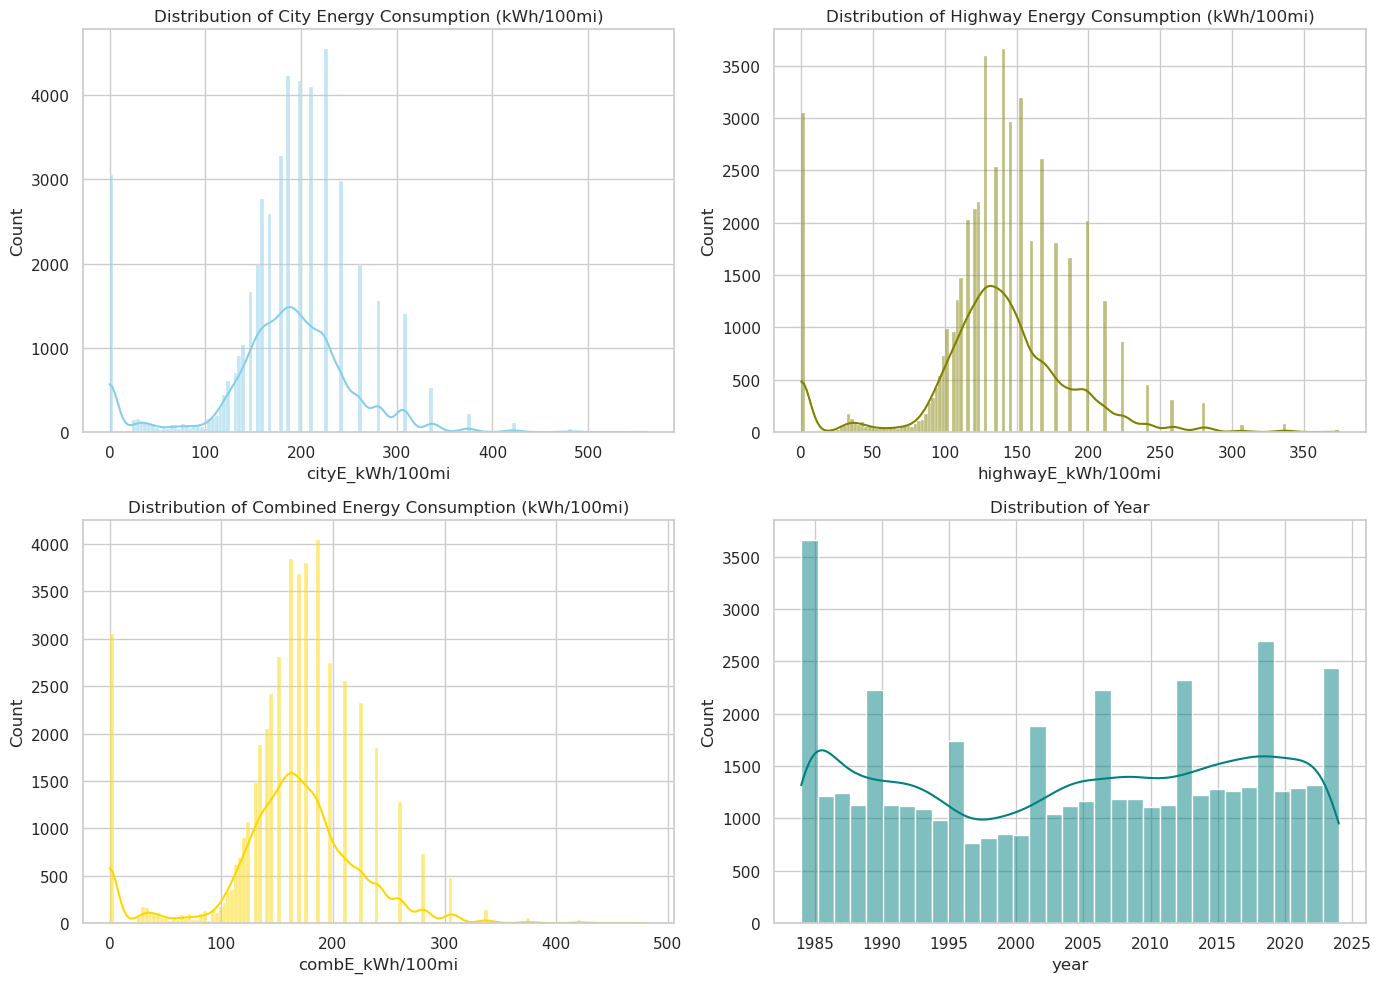

In [5]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the 2 x 2 subplot structure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plotting the distribution of each numerical column
sns.histplot(data=df_final, x="cityE_kWh/100mi", kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].set_title('Distribution of City Energy Consumption (kWh/100mi)')

sns.histplot(data=df_final, x="highwayE_kWh/100mi", kde=True, color="olive", ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Highway Energy Consumption (kWh/100mi)')

sns.histplot(data=df_final, x="combE_kWh/100mi", kde=True, color="gold", ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Combined Energy Consumption (kWh/100mi)')

sns.histplot(data=df_final, x="year", kde=True, color="teal", ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Year')

# Adjusting the layout
plt.tight_layout()

# Show plot
plt.show()

StatementMeta(, ac47d774-42d0-4fc3-8916-b366d3331065, 8, Finished, Available)

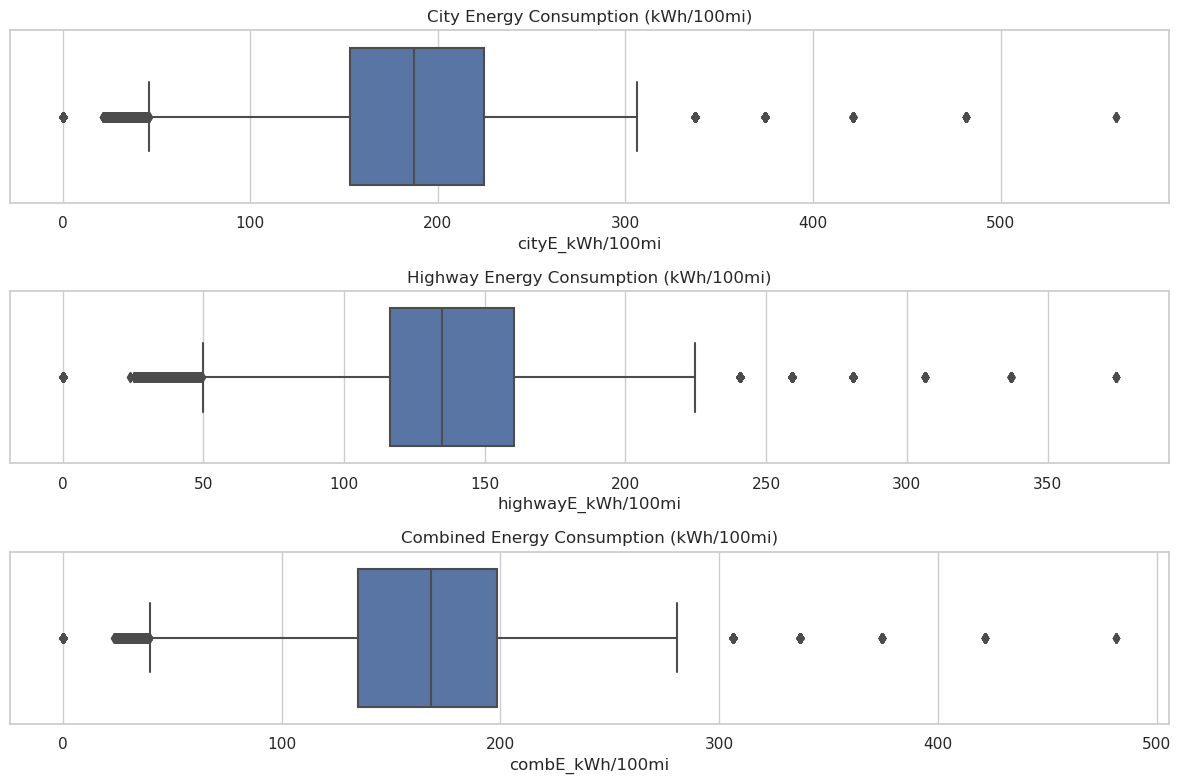

In [6]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the figure for the box plots
plt.figure(figsize=(12, 8))

# Plotting box plots for each energy consumption column
plt.subplot(3, 1, 1)
sns.boxplot(data=df_final, x="cityE_kWh/100mi").set(title='City Energy Consumption (kWh/100mi)')

plt.subplot(3, 1, 2)
sns.boxplot(data=df_final, x="highwayE_kWh/100mi").set(title='Highway Energy Consumption (kWh/100mi)')

plt.subplot(3, 1, 3)
sns.boxplot(data=df_final, x="combE_kWh/100mi").set(title='Combined Energy Consumption (kWh/100mi)')

# Adjusting the layout
plt.tight_layout()

# Show plot
plt.show()

## Hypothesized Reasons for Zero Energy Consumption Entries

The existence of entries with zero energy consumption could be puzzling at first glance. However, several hypotheses can be proposed to explain this phenomenon:

1. **Non-electric Vehicles**: The most straightforward explanation is that these entries represent vehicles that do not use electricity as their primary fuel source. This includes gasoline, diesel, and hybrid vehicles that primarily rely on fuel combustion and may only use electricity for auxiliary functions, not propulsion.

2. **Data Entry Errors**: Another possibility is that these zeros are the result of data entry errors, where actual consumption figures were not entered correctly.

3. **Placeholder Values**: In some cases, zeros might be used as placeholder values for missing data, especially in large datasets where not all information is available for every entry.

4. **Special Vehicle Types**: Some vehicles, such as plug-in hybrids, might show zero energy consumption under certain conditions if the dataset does not account for the energy used to charge the battery or if the vehicle operates solely on its gasoline engine under specific testing conditions.


In [8]:
# Filter entries with 0 energy consumption
zero_cityE = df_final[df_final['cityE_kWh/100mi'] == 0]
zero_highwayE = df_final[df_final['highwayE_kWh/100mi'] == 0]
zero_combE = df_final[df_final['combE_kWh/100mi'] == 0]

# Calculate the count and percentage of 0 energy consumption entries
total_count = len(df_final)
zero_cityE_count = len(zero_cityE)
zero_highwayE_count = len(zero_highwayE)
zero_combE_count = len(zero_combE)

zero_cityE_pct = (zero_cityE_count / total_count) * 100
zero_highwayE_pct = (zero_highwayE_count / total_count) * 100
zero_combE_pct = (zero_combE_count / total_count) * 100

# Print the results
print(f"Entries with 0 city energy consumption: {zero_cityE_count} ({zero_cityE_pct:.2f}%)")
print(f"Entries with 0 highway energy consumption: {zero_highwayE_count} ({zero_highwayE_pct:.2f}%)")
print(f"Entries with 0 combined energy consumption: {zero_combE_count} ({zero_combE_pct:.2f}%)")

StatementMeta(, ac47d774-42d0-4fc3-8916-b366d3331065, 10, Finished, Available)

Entries with 0 city energy consumption: 3048 (6.45%)
Entries with 0 highway energy consumption: 3048 (6.45%)
Entries with 0 combined energy consumption: 3048 (6.45%)

The entries with 0 energy consumption could be primarily for vehicles that are not electric, meaning they rely on gasoline or another fuel type, thus not using electricity as their energy source. Therefore, their electricity consumption metrics would be 0. This would be common in datasets that include a mix of vehicle types, including traditional internal combustion engine vehicles alongside electric and hybrid vehicles.



In [9]:
# Remove rows where any of the energy consumption values are 0
df_filtered = df_final[(df_final['cityE_kWh/100mi'] != 0) & 
                       (df_final['highwayE_kWh/100mi'] != 0) & 
                       (df_final['combE_kWh/100mi'] != 0)]

# Display the filtered DataFrame
df_filtered.head()

StatementMeta(, ac47d774-42d0-4fc3-8916-b366d3331065, 11, Finished, Available)

,make,model,year,cityE_kWh/100mi,highwayE_kWh/100mi,combE_kWh/100mi
0,Alfa Romeo,Spider Veloce 2000,1985,177.368421,134.800000,160.476190
1,Ferrari,Testarossa,1985,374.444444,240.714286,306.363636
2,Dodge,Charger,1985,146.521739,102.121212,124.814815
3,Dodge,B150/B250 Wagon 2WD,1985,337.000000,280.833333,306.363636
4,Subaru,Legacy AWD Turbo,1993,198.235294,146.521739,177.368421


In [11]:
# Define the file path
file_path = '/lakehouse/default/Files/data/processed/processed_vehicle_energy_data.csv'

# Check if the directory exists, if not, create it
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the final DataFrame to a new file
df_filtered.to_csv(file_path, index=False)

print("DataFrame saved to:", file_path)


StatementMeta(, ac47d774-42d0-4fc3-8916-b366d3331065, 13, Finished, Available)

DataFrame saved to: /lakehouse/default/Files/data/processed/processed_vehicle_energy_data.csv
